In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Reading the CSV file and convertin it into a Data Frame
df = pd.read_csv("diabetes2.csv")

In [ ]:
#Printing the top 4 columns of the dataframe
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()
# Display the count of null values for each column
print(null_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].mean())
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


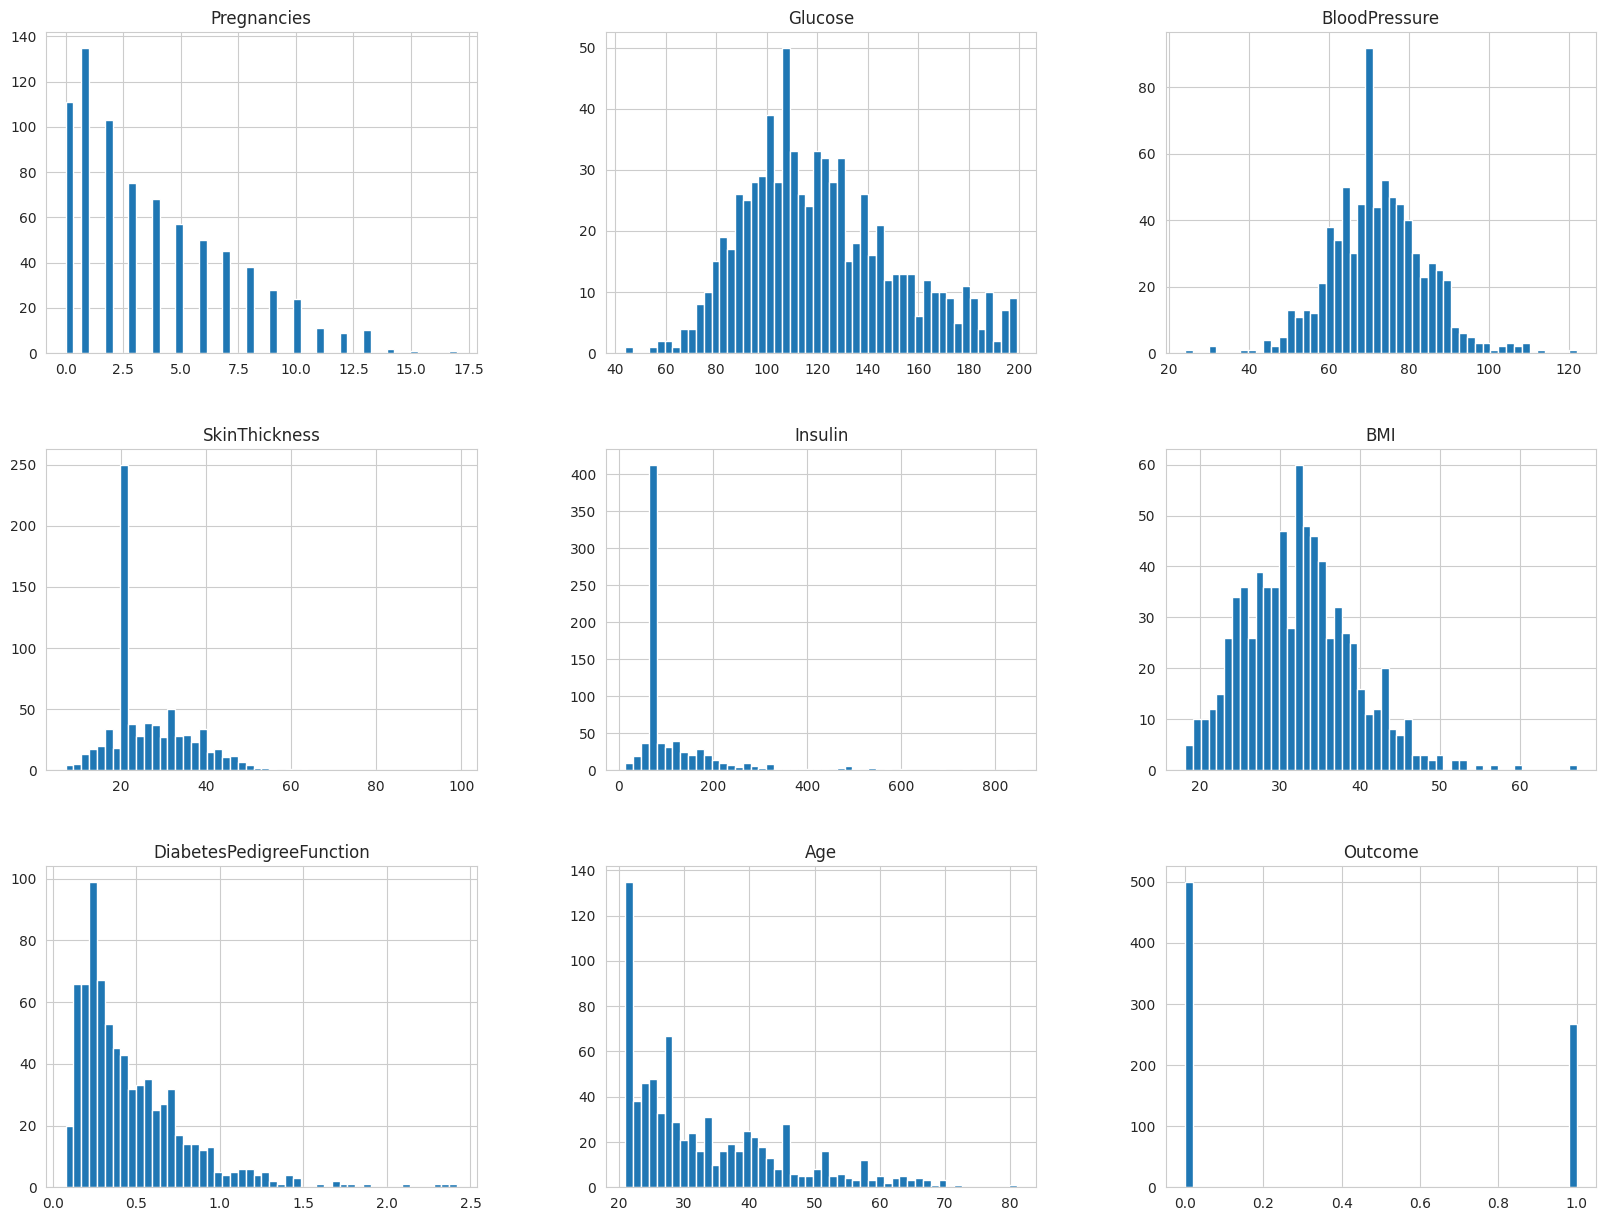

In [ ]:
# Set Seaborn style
sns.set_style('whitegrid')

# Plot density plot for all features
df.hist(bins=50, figsize=(20, 15))
plt.show()

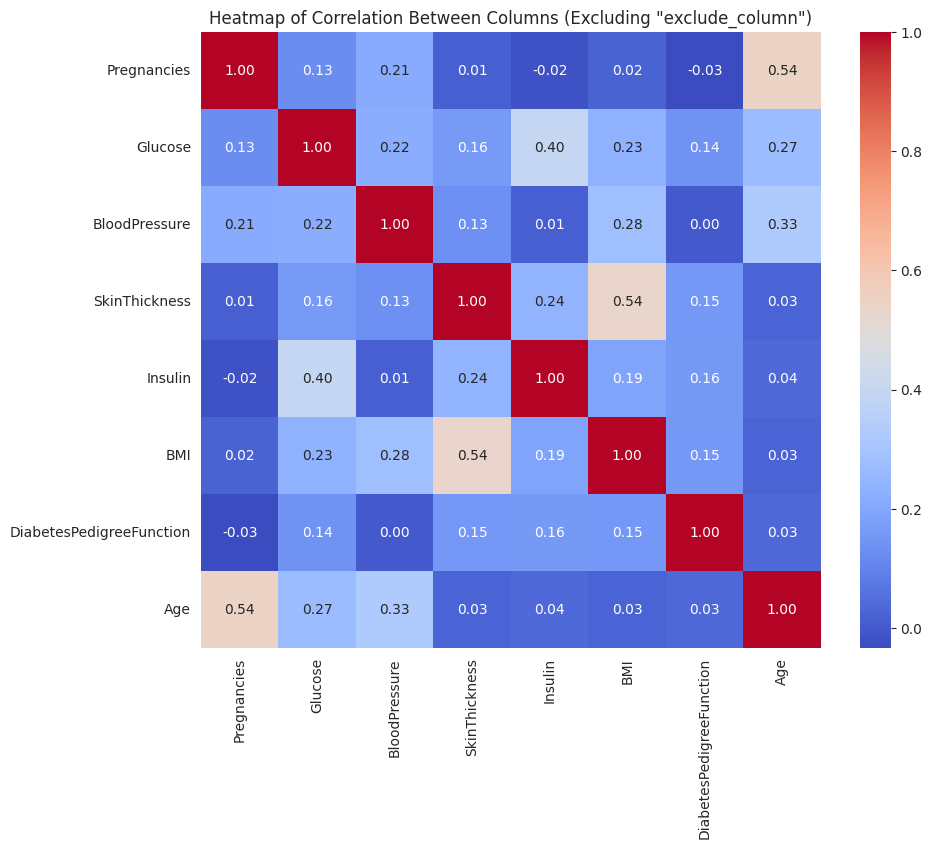

In [ ]:
columns_to_include = df.drop(columns=['Outcome'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(columns_to_include.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Columns (Excluding "exclude_column")')
plt.show()

<Axes: >

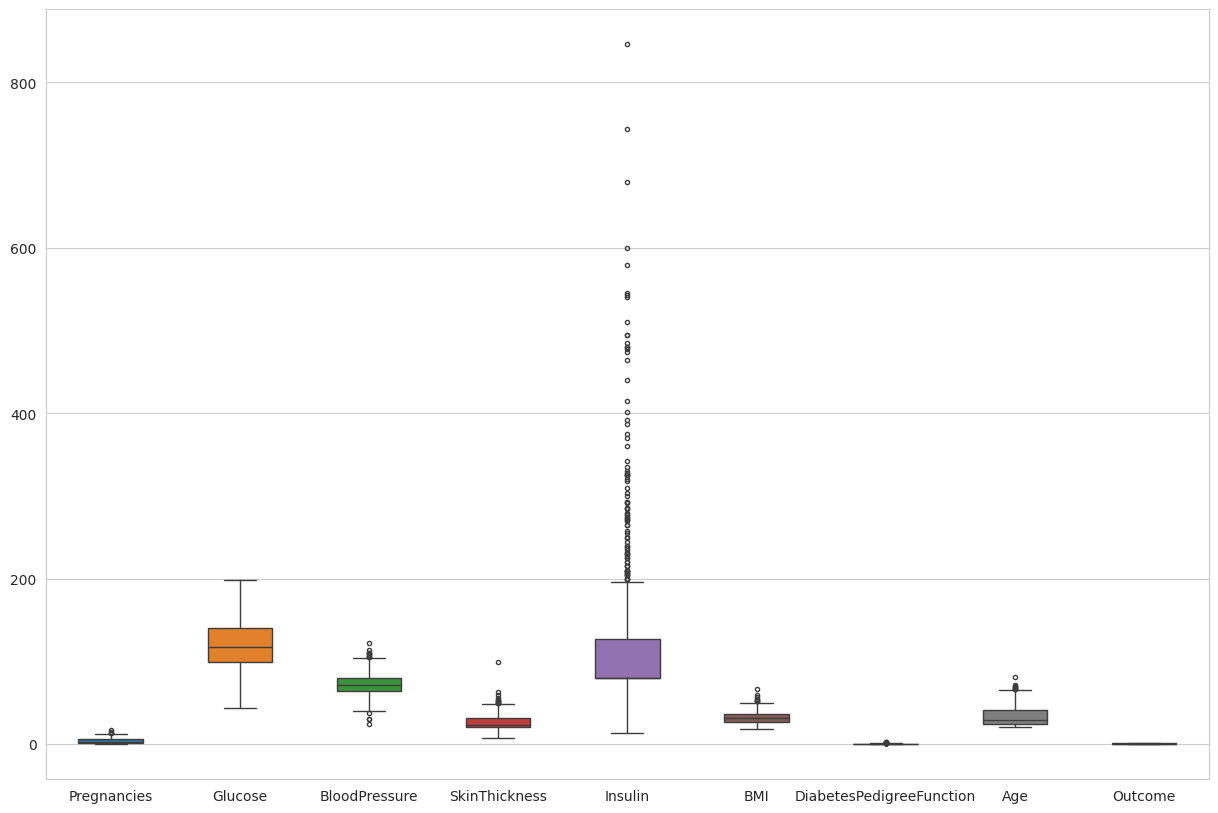

In [ ]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)


In [ ]:
#Splitting the data into X(Input Variable) and y(Output Variable)
X=df.drop(columns= ['Outcome'])
y=df['Outcome']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
np.size(y_test)

154

In [ ]:
# Initialize the logistic regression model
lr = LogisticRegression()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fit the model on the training data
lr.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
# Make predictions on the testing data
predictions = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7662337662337663
Precision: 0.6862745098039216
Recall: 0.6363636363636364
F1 Score: 0.660377358490566
ROC AUC Score: 0.7373737373737373


**Interpretation of the values**

Accuracy: With an accuracy of 0.766, the model correctly predicts around 76.62% of the instances.

Precision: The precision score of 0.686 suggests that approximately 68.63% of the samples classified as positive by the model are indeed positive.

Recall: The recall score, standing at 0.636, implies that roughly 63.64% of the actual positive samples in the dataset are correctly identified by the model.

F1 Score: At 0.660, the F1 score signifies a harmonious balance between precision and recall, indicating the model's overall performance.

ROC AUC Score: With a ROC AUC score of 0.737, the model demonstrates reasonably effective discrimination between positive and negative classes.

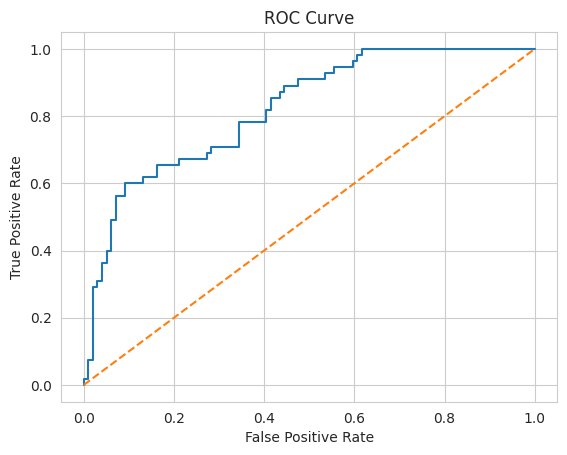

In [ ]:
# Plot ROC curve
y_prob = lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
coefficients = lr.coef_
intercept = lr.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [-0.87387862]
Coefficients: [[ 0.22192395  1.12487346 -0.16824905  0.01648627 -0.18588227  0.7313578
   0.21171528  0.39300256]]


**Explanation of Intercept and Coefficients**
The intercept, set at -0.8738, signifies the baseline probability of diabetes when all predictor variables are zero. Given its negative log odds, it implies that this baseline probability is less than 0.5.

Regarding the individual coefficients:

Pregnancies: Each additional pregnancy corresponds to a 0.222 increase in the log odds of diabetes.

Glucose: A one-unit rise in glucose level is linked with a 1.125 increase in the log odds of diabetes.

BloodPressure: An increase of one unit in blood pressure is associated with a decrease of -0.168 in the log odds of diabetes.

SkinThickness: Each unit increase in skin thickness results in a 0.016 increase in the log odds of diabetes.

Insulin: An increase of one unit in insulin level corresponds to a decrease of -0.186 in the log odds of diabetes.

BMI: A one-unit increase in BMI leads to a 0.731 increase in the log odds of diabetes.

DiabetesPedigreeFunction: Each unit increase in the diabetes pedigree function value is connected to a 0.212 increase in the log odds of diabetes.

Age: Each additional year in age is associated with a 0.393 increase in the log odds of diabetes.

In [ ]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump((scaler, lr), file)

In [ ]:
# making the data availbel in pickle file to test against the test data
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)